# Test

This notebook is only to test our the functionnality / debug of the others .py files

In [40]:
%load_ext autoreload
%autoreload 2
from board import *
from candy import *
from Viz import *

MCTS Search:   3%|▎         | 1/30 [00:00<00:04,  6.21it/s]
[autoreload of mcts failed: Traceback (most recent call last):
  File "/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/alexisbonnafont/Documents/CandyCrusher/mcts.py", line 138, in <module>
    best_move = mcts.search(iterations=30)
  File "/Use

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
pygame 2.6.1 (SDL 2.28.4, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [42]:
b = Board(5,6)
print("Empty Board")
b.display()
print("Random Board")
b.fill_random()
b.display()
print("nothing to merge ?", len(b.check_if_merged_all()))

while b.remove_matches():
    print("Matches removed")
    b.display()
    b.make_it_fall()
    b.fill_random()
    b.display()
    print("nothing to merge ?", len(b.check_if_merged_all()))


Empty Board
|           |
|           |
|           |
|           |
|           |

Random Board
|5 5 2 1 5 5|
|3 6 1 1 6 5|
|1 1 3 4 6 6|
|3 4 3 6 6 5|
|3 1 1 2 5 1|

nothing to merge ? 3
Matches removed
|5 5 2 1 5 5|
|3 6 1 1   5|
|1 1 3 4   6|
|3 4 3 6   5|
|3 1 1 2 5 1|

|5 5 2 1 5 5|
|3 6 1 1 3 5|
|1 1 3 4 1 6|
|3 4 3 6 5 5|
|3 1 1 2 5 1|

nothing to merge ? 0


In [37]:
b = Board(5,6)
b.fill_random()
b.display()


|2 1 3 1 1 1|
|3 2 2 2 1 3|
|1 4 3 2 2 4|
|4 2 4 2 2 3|
|3 2 2 1 3 2|



In [177]:
import time


b = Board(5,6)
b.fill_random()
b.update()
b.display()
legal_moves = b.get_legal_moves()

print("Legal moves:")
for move in legal_moves:
    print(move)
    b.display_move(move)


|5 5 6 2 6 2|
|2 3 2 1 1 3|
|5 6 2 1 1 2|
|2 4 3 2 2 1|
|5 6 2 5 5 4|

Legal moves:
((0, 2), (0, 3))
|5 5 6 2 6 2|
|2 3 2 1 1 3|
|5 6 2 1 1 2|
|2 4 3 2 2 1|
|5 6 2 5 5 4|

((2, 2), (3, 2))
|5 5 6 2 6 2|
|2 3 2 1 1 3|
|5 6 2 1 1 2|
|2 4 3 2 2 1|
|5 6 2 5 5 4|

((2, 5), (3, 5))
|5 5 6 2 6 2|
|2 3 2 1 1 3|
|5 6 2 1 1 2|
|2 4 3 2 2 1|
|5 6 2 5 5 4|

((3, 2), (3, 3))
|5 5 6 2 6 2|
|2 3 2 1 1 3|
|5 6 2 1 1 2|
|2 4 3 2 2 1|
|5 6 2 5 5 4|

((3, 2), (4, 2))
|5 5 6 2 6 2|
|2 3 2 1 1 3|
|5 6 2 1 1 2|
|2 4 3 2 2 1|
|5 6 2 5 5 4|

((3, 4), (3, 5))
|5 5 6 2 6 2|
|2 3 2 1 1 3|
|5 6 2 1 1 2|
|2 4 3 2 2 1|
|5 6 2 5 5 4|



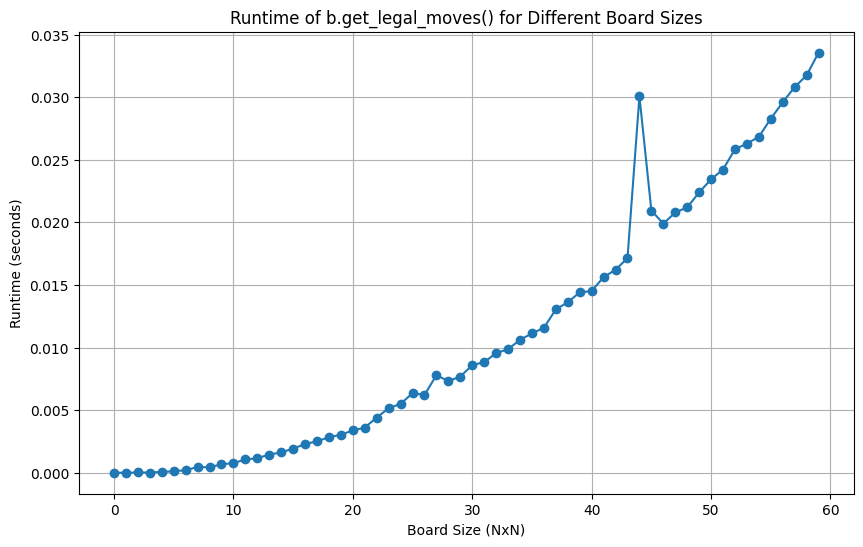

In [5]:
import time
import matplotlib.pyplot as plt
from board import Board, Action

def measure_runtime(board_sizes):
    runtimes = {}
    for size in board_sizes:
        b = Board(size, size)
        b.fill_random()
        a = Action(b)
        
        start_time = time.time()
        legal_moves = b.get_legal_moves()
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes[size] = runtime
    return runtimes

# List of board sizes to test
board_sizes = range(60)

# Measure and print runtimes
runtimes = measure_runtime(board_sizes)

# Plot the results
sizes = list(runtimes.keys())
times = list(runtimes.values())

plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title('Runtime of b.get_legal_moves() for Different Board Sizes')
plt.xlabel('Board Size (NxN)')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.show()

In [35]:
action = Action(b)
b.fill_random()
b.display()
print("Swapping (0,0) and (0,1)")
action.swap(0,0, 0,1)
b.display()
print("Swapping (0,1) and (0,2)")
action.raw_swap(0,1, 0,2)
b.display()

# Show what happens when we swap two candies that don't match
try: 
    action.raw_swap(0,4, 0,1)
except Exception as e:
    print(e)
b.display()

|3 2 3 2 1 1|
|3 5 4 2 2 5|
|6 2 2 1 6 5|
|3 5 5 3 1 4|
|2 4 1 4 2 2|

Swapping (0,0) and (0,1)
|3 2 3 2 1 1|
|3 5 4 2 2 5|
|6 2 2 1 6 5|
|3 5 5 3 1 4|
|2 4 1 4 2 2|

Swapping (0,1) and (0,2)
|3 3 2 2 1 1|
|3 5 4 2 2 5|
|6 2 2 1 6 5|
|3 5 5 3 1 4|
|2 4 1 4 2 2|

Can only swap adjacent candies.
|3 3 2 2 1 1|
|3 5 4 2 2 5|
|6 2 2 1 6 5|
|3 5 5 3 1 4|
|2 4 1 4 2 2|



In [5]:
b.empty()
b.fill_random()
b.display()

up=b.update()
if up:
    print("something was merged")
    b.display()



print("Swapping (2,3) and (2,4)")
sw=action.swap(2,3, 2,4)
if sw==False:
    print("No match")
else:
    b.display()
    b.update()
    print("After update")
    b.display()

|2 2 1 1 4 5|
|1 1 6 3 5 4|
|2 3 1 3 3 6|
|3 2 1 4 6 3|
|3 1 3 6 2 5|

Swapping (2,3) and (2,4)
No match


## Tester la vizu (stylééé)

Commandes: 

-clicker pour selectionner le premier candy

-Fleches pour selectionner le 2e

-s pour générer une nouvelle grille si bloqué

-q pour quitter (moi ca marche pas, je dois stopper la cellule dans le notebook)

In [26]:
np.random.seed(1)
b = Board(5,6)
b.fill_random()
b.update()
a=Action(b)
v = Viz(b,a,False)
v.Visualize()

[]
[]
(1, 5) [(2, 4), (2, 5)] False
(2, 5) [(2, 4), (2, 5)] False
coucou
(3, 5) [(2, 4), (2, 5)] True
(4, 5) [(2, 4), (2, 5)] True
[(2, 5)]
[(2, 4), (2, 5)]
[]
[]
[]
[(2, 3), (3, 3)]
[]
[]
[(2, 3)]
[(2, 4), (2, 3)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(3, 3), (3, 4)]
[]
[]
[]
[(3, 1), (4, 1)]
[]
[]


KeyboardInterrupt: 